In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Q1. Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?


In [4]:
#dataset initialization and some light pre-processing:

sales = pd.read_csv('data/Online_Sales.csv')
columns = sales.columns
columns = [str.lower(column) for column in columns]
sales.columns = columns

#change transaction_date to pd.datetime:

sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [5]:
df = sales.loc[:,['customerid' , 'transaction_date']]
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = pd.to_datetime(df['transaction_date']).dt.month_name()
df['mnum'] = pd.to_datetime(df['transaction_date']).dt.month
df

,customerid,transaction_date,month,mnum
0,17850,2019-01-01,January,1
1,17850,2019-01-01,January,1
2,17850,2019-01-01,January,1
3,17850,2019-01-01,January,1
4,17850,2019-01-01,January,1
...,...,...,...,...
52919,14410,2019-12-31,December,12
52920,14410,2019-12-31,December,12
52921,14410,2019-12-31,December,12
52922,14600,2019-12-31,December,12


In [6]:
#get first transaction
ftransactions = df.groupby('customerid')['transaction_date'].agg('min').reset_index()
#extract month from transaction_date

ftransactions.rename(columns = {'transaction_date':'first_transaction_date'} , inplace = True)
ftransactions['fmonth'] = ftransactions['first_transaction_date'].dt.month
ftransactions['month'] = ftransactions['first_transaction_date'].dt.month_name()
ftransactions

#group by month

acq = ftransactions.groupby('month').agg({'customerid':'nunique' , 'fmonth':'first'}).reset_index().sort_values(by = 'fmonth').set_index('fmonth').rename(columns={'customerid':'acquisitions'})
acq


,month,acquisitions
fmonth,,
1,January,215
2,February,96
3,March,177
4,April,163
5,May,112
6,June,137
7,July,94
8,August,135
9,September,78


Highest customer acquisition month -> January(215)

Lowest customer acquisition month -> November(68)


### Q2. Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?


[]

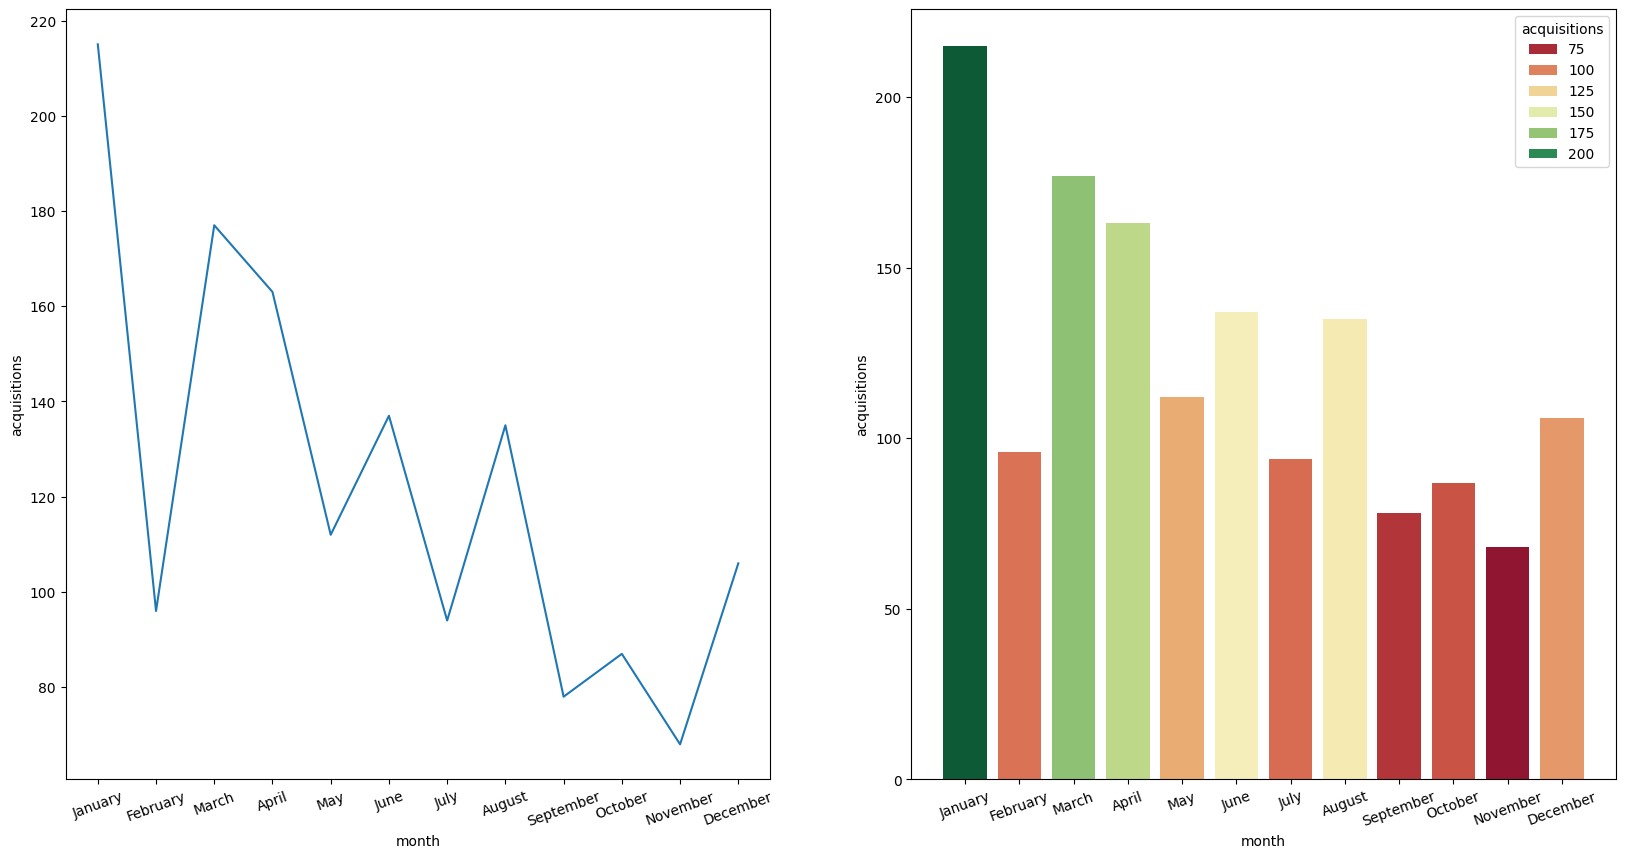

In [7]:
#accusitations throughout the year:
fig , axes = plt.subplots(1,2 , figsize = (20,10))
plt.sca(axes[0])
sns.lineplot(acq , x = 'month' , y = 'acquisitions')
plt.xticks(rotation = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(acq , x = 'month' , y = 'acquisitions' , hue = 'acquisitions' , palette='RdYlGn')
plt.xticks(rotation = 20)
plt.plot()

### To address the fluctuations in true customer acquisition and ensure consistent monthly growth, here are 7 strategic recommendations, backed by your data:

### 1. Analyze Peak Months and Replicate Success

What the data says: January (215), March (177), April (163) are strong acquisition months.
Strategy:

Audit campaigns/promotions from those months — what worked?

Replicate those strategies in slower months (e.g., Nov, Sep).

✅ Example: If a January promo drove results, launch similar winter promotions in Nov–Dec.

### 2. Boost Engagement in Low-Acquisition Months

Low-performing months: November (68), September (78), October (87)
Strategy:

Introduce “off-season” offers and urgency-driven sales (e.g., flash deals, limited-time discounts).

Leverage email reactivation for dormant leads before low months.

✅ Example: Send “We Miss You!” emails to inactive users in August to boost September.

### 3. Introduce Referral & Loyalty Programs

Why: New customers often come from word-of-mouth, and loyal customers can bring them.
Strategy:

Offer referral incentives for bringing new users.

Introduce loyalty tiers with increasing benefits.

✅ Example: “Refer a friend & both get ₹200 off” or “Gold members get early access to sales.”

### 4. Optimize and Balance Marketing Spend

Use your Marketing_Spend.csv:

Analyze if marketing spend correlates with spikes.

Redistribute budget: Increase spend in weak months, optimize high-CAC months.

✅ Example: Shift ad budget from July–August to September–October if they underperform.

### 5. Align Product Launches with Low Periods

Strategy:

Plan new product drops, bundles, or themes in dull periods.

Tie to relevant cultural or seasonal events (festivals, back-to-school, etc.).

✅ Example: “Tech Essentials for Autumn” bundles in September.

### 6. Personalized Email & SMS Campaigns

Strategy:

Segment customers by first purchase month.

Send tailored messages during similar periods next year to trigger recurring behavior.

✅ Example: A March buyer might respond to a “1-Year Anniversary Offer” in March next year.

### 7. Retarget Website Visitors with Smart Ads

Strategy:

Use pixel-based retargeting to bring back interested users from low-performing periods.

Customize creatives to match products they viewed.

✅ Example: “Still interested in the Nest Thermostat? It’s 10% off this week!”


### Q3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?


In [8]:
fdf = ftransactions.loc[:,['customerid' , 'first_transaction_date']]
# fdf

mdf = pd.merge(df , fdf)
repeateddf = mdf[mdf['transaction_date'] > mdf['first_transaction_date']].copy()
repeateddf['fmonth'] = repeateddf['first_transaction_date'].dt.month_name()
repeateddf['fmonthnum'] = repeateddf['first_transaction_date'].dt.month
repeateddf

ret = repeateddf.groupby('fmonth').agg({'customerid':'nunique' , 'mnum' : 'first'}).sort_values(by = 'mnum').reset_index()
ret.rename(columns = {'customerid':'retentions'} , inplace = True)
ret

,fmonth,retentions,mnum
0,January,133,1
1,February,79,2
2,March,120,3
3,April,95,4
4,May,61,5
5,June,67,6
6,July,42,7
7,August,52,8
8,September,19,9
9,October,28,10


[]

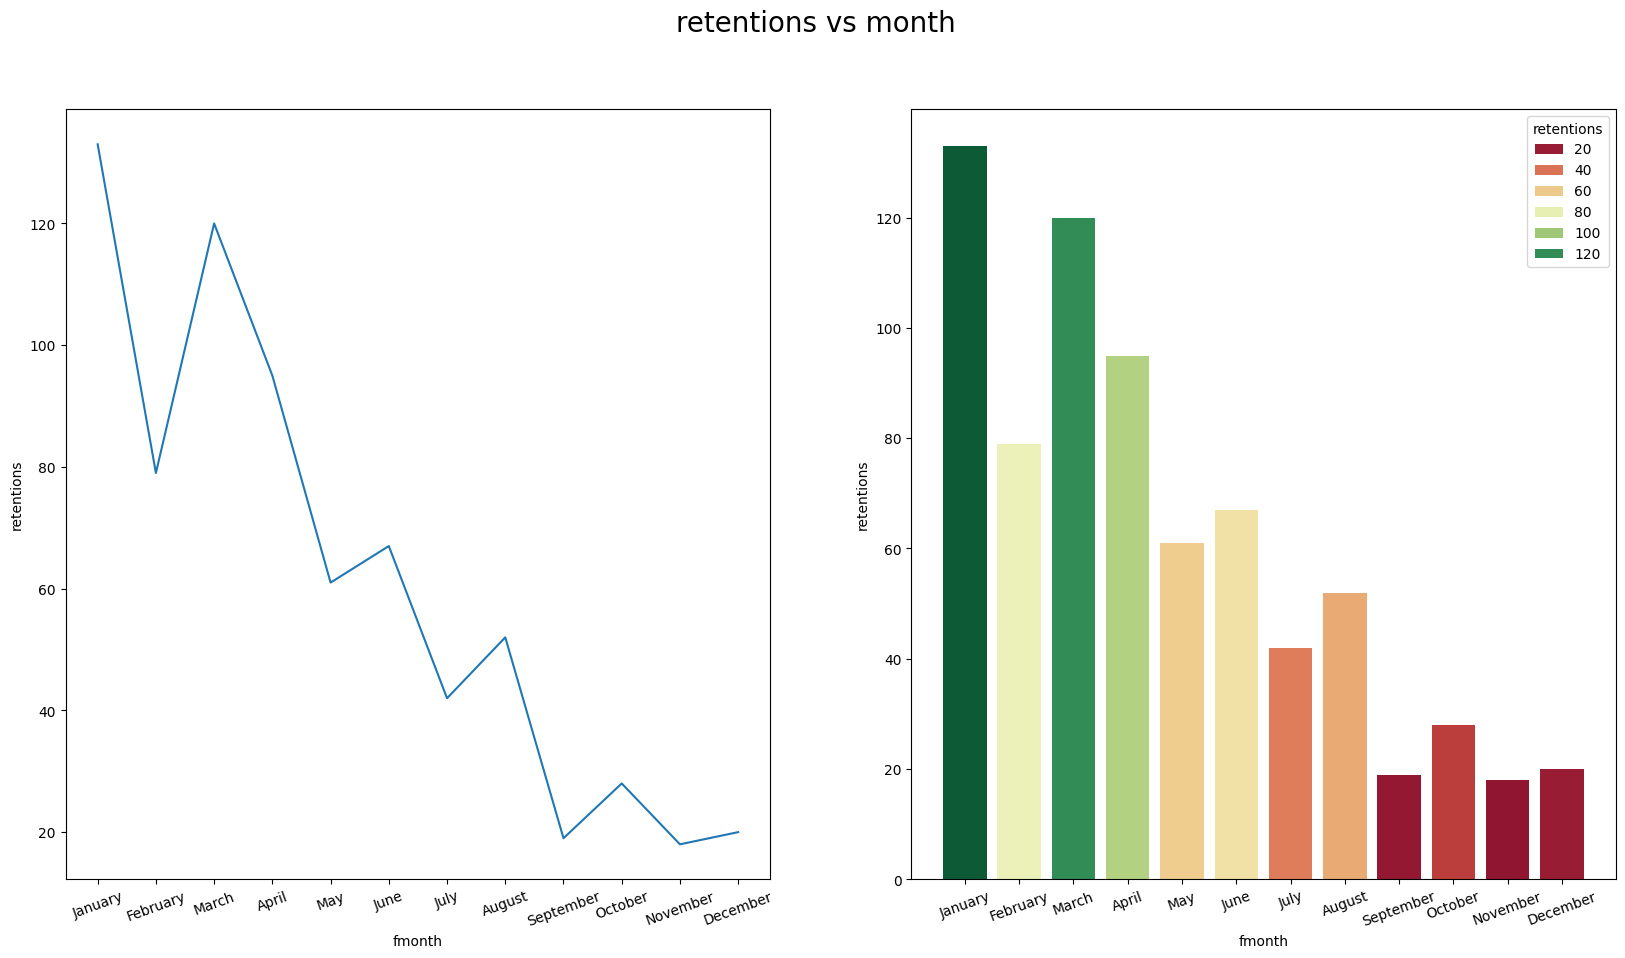

In [9]:
fig , axes = plt.subplots(1, 2, figsize = (20 , 10))

plt.sca(axes[0])
sns.lineplot(ret , x = 'fmonth' , y = 'retentions')
plt.xticks(rotation = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(ret , x = 'fmonth' , y = 'retentions' , hue = 'retentions' , palette='RdYlGn')
plt.xticks(rotation = 20)
fig.suptitle('retentions vs month' , fontsize = 20)
plt.plot()

In [10]:
customers = pd.read_excel('data/CustomersData.xlsx')
customers.columns = [str.lower(column) for column in customers.columns]
customers

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [11]:
ftransactions

,customerid,first_transaction_date,fmonth,month
0,12346,2019-09-15,9,September
1,12347,2019-03-24,3,March
2,12348,2019-06-22,6,June
3,12350,2019-12-14,12,December
4,12356,2019-09-15,9,September
...,...,...,...,...
1463,18259,2019-04-05,4,April
1464,18260,2019-06-22,6,June
1465,18269,2019-04-05,4,April
1466,18277,2019-10-23,10,October


In [12]:
cdf = pd.merge(repeateddf , customers , on = 'customerid')
cdf

,customerid,transaction_date,month,mnum,first_transaction_date,fmonth,fmonthnum,gender,location,tenure_months
0,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
1,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
2,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
3,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
4,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
...,...,...,...,...,...,...,...,...,...,...
26958,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26959,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26960,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26961,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33


In [13]:
repeatedLocations = cdf.groupby('month').agg({'location':'value_counts'}).rename(columns = {'location':'lfreq'}).reset_index()
locations = pd.merge(repeatedLocations , ret , left_on='month' , right_on='fmonth').sort_values(by = 'mnum')
locations.head()

,month,location,lfreq,fmonth,retentions,mnum
24,January,Washington DC,39,January,133,1
23,January,New Jersey,68,January,133,1
22,January,New York,78,January,133,1
21,January,California,246,January,133,1
20,January,Chicago,323,January,133,1


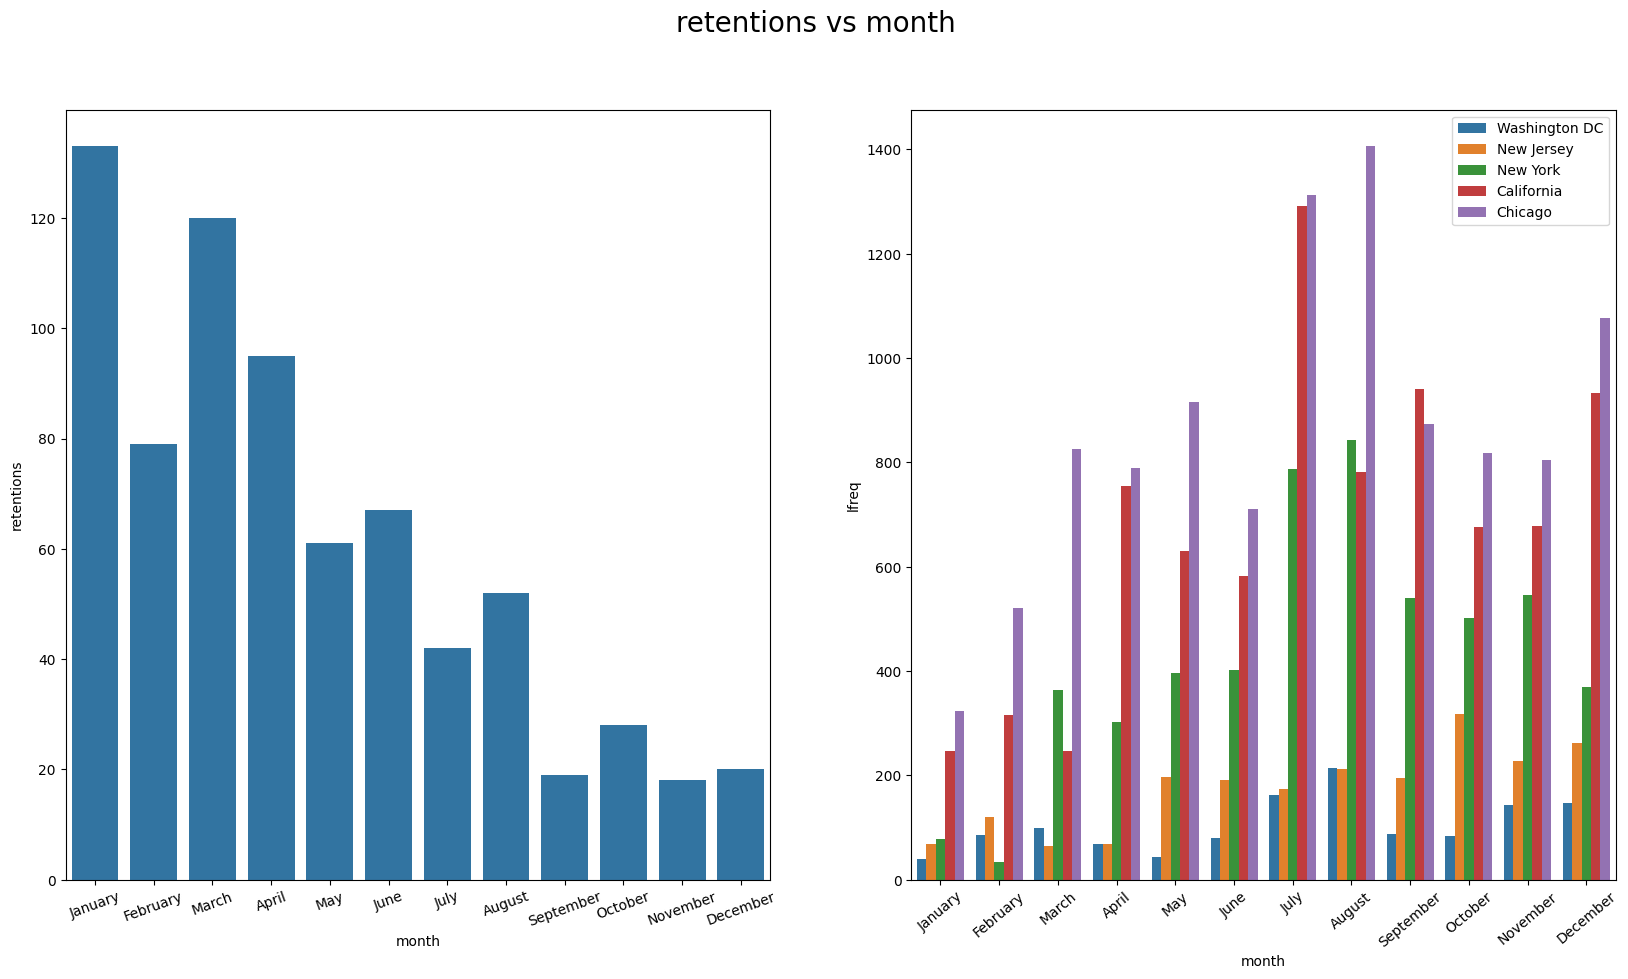

In [14]:
fig , axes = plt.subplots(1, 2, figsize = (20 , 10))
plt.sca(axes[0])
sns.barplot(locations , x = 'month' , y = 'retentions')
plt.xticks(rotation = 20)
fig.suptitle('retentions vs month' , fontsize = 20)


plt.sca(axes[1])
sns.barplot(locations , x = 'month' , y = 'lfreq' , hue = 'location')
plt.xticks(rotation = 40)
plt.legend()
plt.show()

In [15]:
coupons = pd.read_csv('./data/Discount_Coupon.csv')
coupons.columns = [str.lower(column) for column in coupons.columns]
coupons.head()

,month,product_category,coupon_code,discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [16]:
# convert short form of months to long
months = coupons['month']
coupons['month'] = pd.to_datetime(months , format = '%b').dt.month_name()
coupons.head()

,month,product_category,coupon_code,discount_pct
0,January,Apparel,SALE10,10
1,February,Apparel,SALE20,20
2,March,Apparel,SALE30,30
3,January,Nest-USA,ELEC10,10
4,February,Nest-USA,ELEC20,20


In [17]:
mdf = locations.merge(coupons , on = 'month' , how = 'left')
mdf.head()

,month,location,lfreq,fmonth,retentions,mnum,product_category,coupon_code,discount_pct
0,January,Washington DC,39,January,133,1,Apparel,SALE10,10
1,January,Washington DC,39,January,133,1,Nest-USA,ELEC10,10
2,January,Washington DC,39,January,133,1,Office,OFF10,10
3,January,Washington DC,39,January,133,1,Drinkware,EXTRA10,10
4,January,Washington DC,39,January,133,1,Lifestyle,EXTRA10,10


In [18]:
gdf = mdf.groupby('month').agg({'discount_pct':'mean' , 'retentions':'max' ,'mnum':'first'}).reset_index().sort_values(by='mnum')
gdf

,month,discount_pct,retentions,mnum
4,January,10.0,133,1
3,February,20.0,79,2
7,March,30.0,120,3
0,April,10.0,95,4
8,May,20.0,61,5
6,June,30.0,67,6
5,July,10.0,42,7
1,August,20.0,52,8
11,September,30.0,19,9
10,October,10.0,28,10


[]

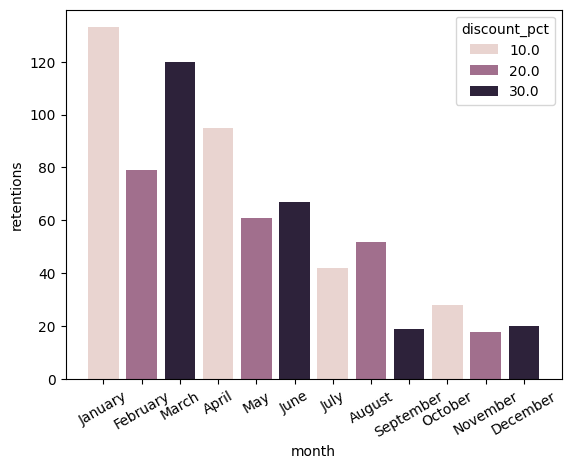

In [19]:
sns.barplot(gdf , x = 'month' , y = 'retentions' , hue = 'discount_pct')
plt.xticks(rotation = 30)
plt.plot()

### Q5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?


In [20]:
#get revenue generated by first purchases
purchases = pd.read_csv('./data/Online_Sales.csv')
purchases.columns = [str.lower(column) for column in purchases.columns]
purchases['transaction_date'] = pd.to_datetime(purchases['transaction_date'])
purchases['mnum'] = purchases['transaction_date'].dt.month
purchases['month'] = purchases['transaction_date'].dt.month_name()
purchases['revenue'] = purchases['avg_price'] * purchases['quantity']
purchases


,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,1,January,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,12,December,121.30
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,12,December,48.92
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,12,December,151.88
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,December,402.60


In [21]:
# group by customers to get first and later purchases by each customer

gdf = purchases.groupby('customerid').agg({'transaction_date':'first'}).reset_index().rename(columns = 
{'transaction_date':'first_transaction_date'}).merge(purchases , on = 'customerid' , how = 'right')
gdf.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [22]:
first_purchases = gdf[gdf['transaction_date'] == gdf['first_transaction_date']]
first_purchases.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [23]:
monthly_first_purchases = first_purchases.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).sort_values(by = 'mnum')
monthly_first_purchases

,revenue,mnum
month,,
January,323744.46,1
February,200818.93,2
March,234593.76,3
April,172152.33,4
May,153077.16,5
June,172170.63,6
July,103836.55,7
August,167440.86,8
September,132004.07,9


In [24]:
repeated_purchses = gdf[gdf['transaction_date'] > gdf['first_transaction_date']]
repeated_purchses.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
89,14688,2019-01-01,16737,2019-01-02,GGOEGHPJ080110,Google 5-Panel Cap,Headgear,2,19.59,6.5,Clicked,1,January,39.18
90,14688,2019-01-01,16738,2019-01-02,GGOEAKDH019899,Windup Android,Lifestyle,2,3.29,6.5,Clicked,1,January,6.58
91,14688,2019-01-01,16739,2019-01-02,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,122.77,6.5,Not Used,1,January,122.77
92,14688,2019-01-01,16740,2019-01-02,GGOENEBJ081899,Nest Learning Thermostat 3rd Gen - CA - Stainl...,Nest-Canada,1,205.30,8.7,Used,1,January,205.30
93,14688,2019-01-01,16740,2019-01-02,GGOENEBQ081699,Nest Protect Smoke + CO White Battery Alarm - CA,Nest-Canada,3,107.29,8.7,Clicked,1,January,321.87


In [25]:
monthly_repeated_purchases = repeated_purchses.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).sort_values(by = 'mnum')
monthly_repeated_purchases

,revenue,mnum
month,,
January,79880.12,1
February,110000.87,2
March,115014.33,3
April,229466.09,4
May,154686.26,5
June,148910.75,6
July,268801.52,7
August,233769.51,8
September,228544.33,9


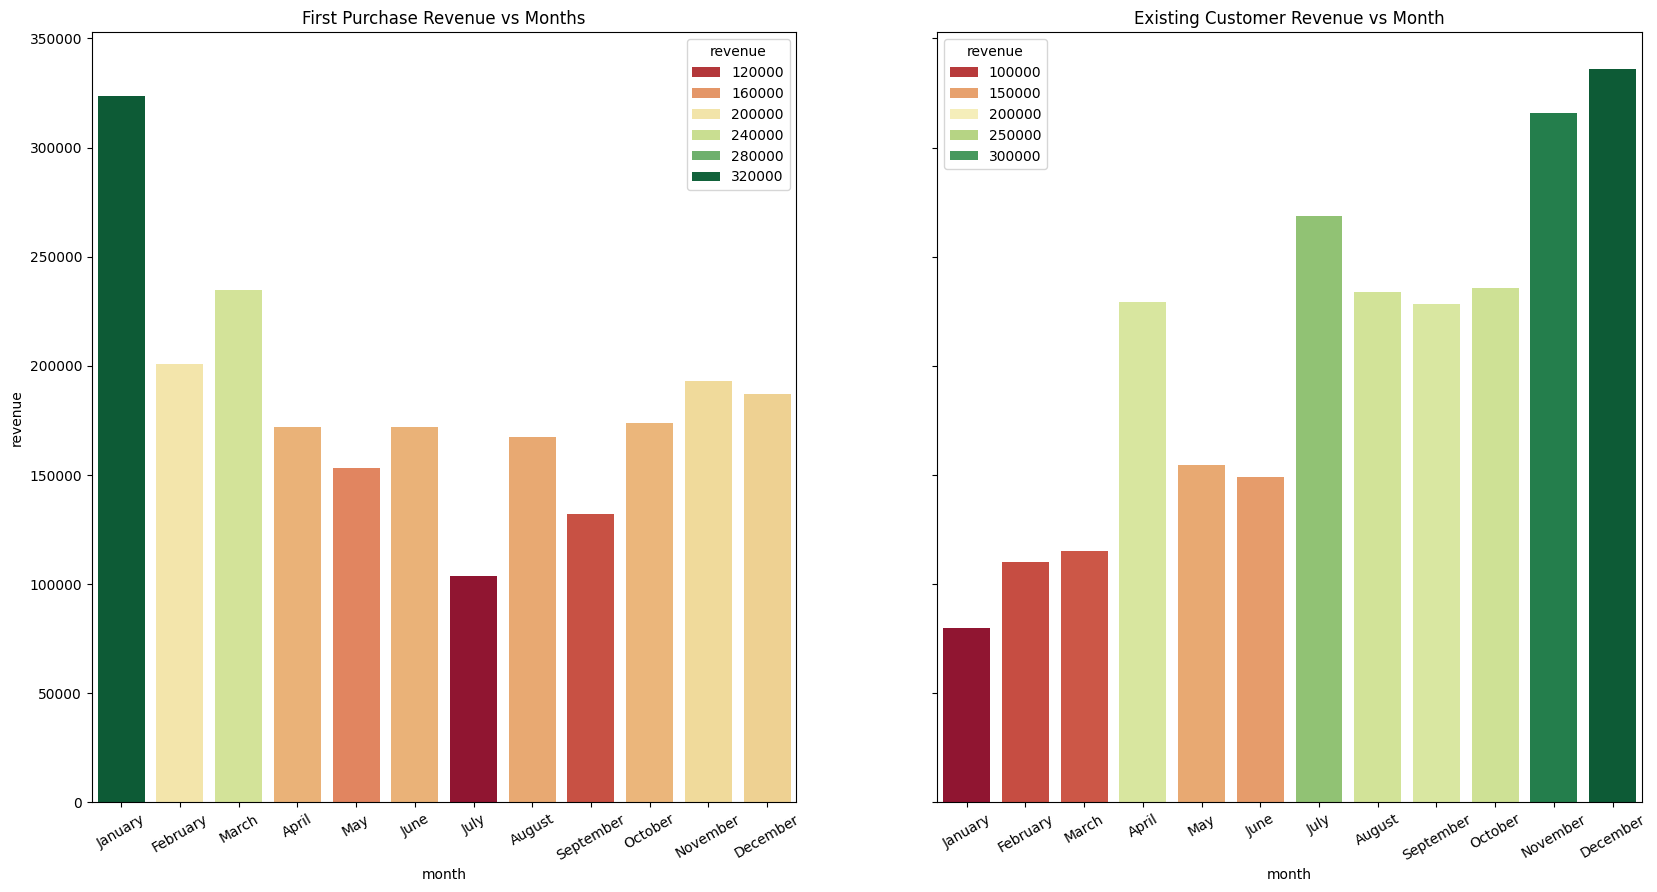

In [26]:
fig , axes = plt.subplots(1,2 , figsize = (20,10) , sharey=True)
plt.sca(axes[0])
sns.barplot(monthly_first_purchases , x = 'month' , y = 'revenue' , hue = 'revenue' , palette= 'RdYlGn')
plt.xticks(rotation = 30)
plt.title('First Purchase Revenue vs Months')
# plt.show()

plt.sca(axes[1])
sns.barplot(monthly_repeated_purchases , x = 'month' , y = 'revenue' , hue = 'revenue' , palette= 'RdYlGn')
plt.xticks(rotation = 30)
plt.title('Existing Customer Revenue vs Month')
plt.show()


### Q.6 Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?


In [27]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [28]:
monthly_revenue = purchases.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).reset_index().sort_values(by='mnum')
monthly_revenue

,month,revenue,mnum
4,January,403624.58,1
3,February,310819.80,2
7,March,349608.09,3
0,April,401618.42,4
8,May,307763.42,5
6,June,321081.38,6
5,July,372638.07,7
1,August,401210.37,8
11,September,360548.40,9
10,October,409681.28,10


In [29]:
monthly_coupons = purchases.groupby('month').agg({'coupon_status':'value_counts'}).rename(columns={'coupon_status':'count'})
monthly_coupons.reset_index(inplace=True)
monthly_coupons['mnum'] = pd.to_datetime(monthly_coupons['month'] , format = '%B').dt.month
monthly_coupons.sort_values(by = 'mnum' , inplace=True)
monthly_coupons.head()

,month,coupon_status,count,mnum
14,January,Not Used,605,1
13,January,Used,1383,1
12,January,Clicked,2075,1
11,February,Not Used,511,2
10,February,Used,1098,2


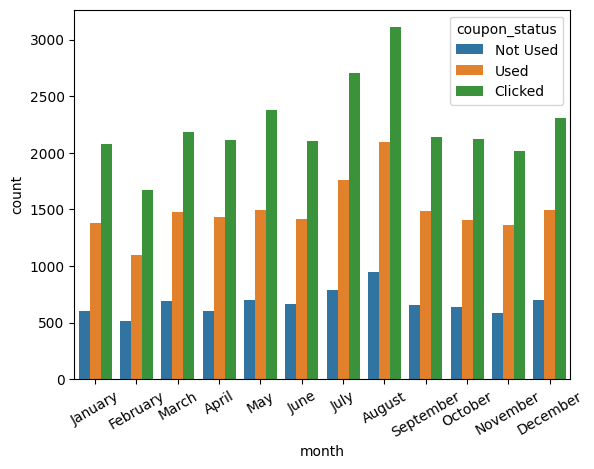

In [30]:
sns.barplot(monthly_coupons , x = 'month' , y = 'count' , hue = 'coupon_status')
plt.xticks(rotation = 30)
plt.show()

In [31]:
cgdf = purchases.groupby('coupon_status').agg({'revenue':'sum'})
cgdf

,revenue
coupon_status,
Clicked,2377266.65
Not Used,732709.87
Used,1560818.10


Text(0.5, 1.0, 'Revenue vs Coupon_Status')

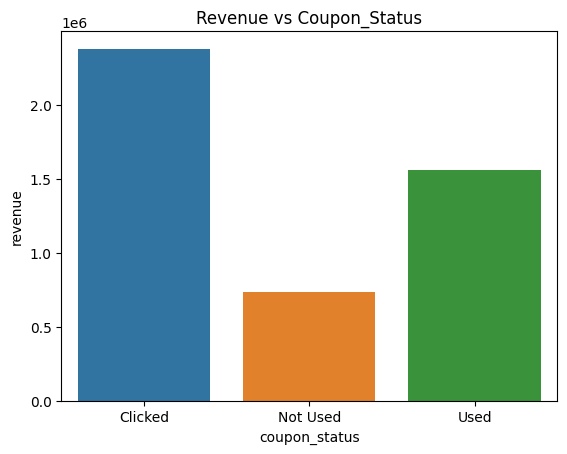

In [32]:
sns.barplot(cgdf , x = 'coupon_status' , y = 'revenue' , hue = 'coupon_status')
plt.title('Revenue vs Coupon_Status')

### Q.7 Identify the top-performing products and analyze the factors driving their success.


In [33]:
products = purchases.groupby('product_sku').agg({'revenue':'sum' , 'quantity':'sum', 'product_description':'first', 'avg_price':'first' , 'product_category':'first'}).sort_values(by=['revenue' , 'quantity'] , ascending=False)
products

,revenue,quantity,product_description,avg_price,product_category
product_sku,,,,,
GGOENEBJ079499,688916.34,4570,Nest Learning Thermostat 3rd Gen-USA - Stainle...,153.71,Nest-USA
GGOENEBQ078999,629977.12,5206,Nest Cam Outdoor Security Camera - USA,122.77,Nest-USA
GGOENEBB078899,528612.93,4402,Nest Cam Indoor Security Camera - USA,122.77,Nest-USA
GGOENEBQ079099,213819.16,2683,Nest Protect Smoke + CO White Battery Alarm-USA,81.50,Nest-USA
GGOENEBQ079199,212495.57,2670,Nest Protect Smoke + CO White Wired Alarm-USA,81.50,Nest-USA
...,...,...,...,...,...
GGOEGAXH065355,9.51,1,Google Toddler Short Sleeve T-shirt Green,9.51,Apparel
GGOEYAEJ029616,9.49,1,YouTube Women's Short Sleeve Tri-blend Badge T...,9.49,Apparel
GGOEGALL074617,7.65,2,Google Women's Short Sleeve Badge Tee Navy,3.40,Apparel


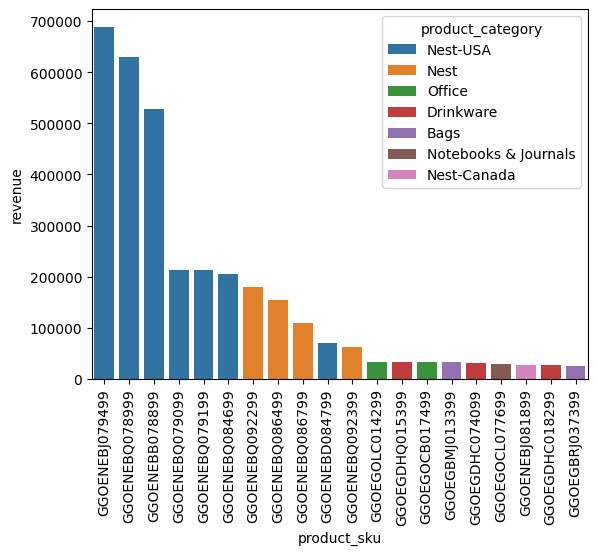

In [34]:
sns.barplot(products.head(20) , x = 'product_sku' , y = 'revenue' , hue = 'product_category')
plt.xticks(rotation = 90)
plt.show()

### Q.8 Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?


In [35]:
monthly_revenue

,month,revenue,mnum
4,January,403624.58,1
3,February,310819.80,2
7,March,349608.09,3
0,April,401618.42,4
8,May,307763.42,5
6,June,321081.38,6
5,July,372638.07,7
1,August,401210.37,8
11,September,360548.40,9
10,October,409681.28,10


In [41]:
marketing = pd.read_csv('./data/Marketing_Spend.csv')
marketing.columns = [str.lower(column) for column in marketing.columns]
marketing['date'] = pd.to_datetime(marketing.date)
marketing['month'] = marketing['date'].dt.month_name()
marketing['mnum'] = marketing['date'].dt.month
marketing['spend'] = marketing['online_spend'] + marketing['offline_spend']
marketing

,date,offline_spend,online_spend,month,mnum,spend
0,2019-01-01,4500,2424.50,January,1,6924.50
1,2019-01-02,4500,3480.36,January,1,7980.36
2,2019-01-03,4500,1576.38,January,1,6076.38
3,2019-01-04,4500,2928.55,January,1,7428.55
4,2019-01-05,4500,4055.30,January,1,8555.30
...,...,...,...,...,...,...
360,2019-12-27,4000,3396.87,December,12,7396.87
361,2019-12-28,4000,3246.84,December,12,7246.84
362,2019-12-29,4000,2546.58,December,12,6546.58
363,2019-12-30,4000,674.31,December,12,4674.31


In [46]:
monthly_marketing = marketing.groupby('month').agg({'spend':'sum'}).reset_index()
monthly_marketing

,month,spend
0,April,157026.83
1,August,142904.15
2,December,198648.75
3,February,137107.92
4,January,154928.95
5,July,120217.85
6,June,134318.14
7,March,122250.09
8,May,118259.64
9,November,161144.96


In [48]:
mdf = pd.merge(monthly_revenue , monthly_marketing , on = 'month')
mdf

,month,revenue,mnum,spend
0,January,403624.58,1,154928.95
1,February,310819.80,2,137107.92
2,March,349608.09,3,122250.09
3,April,401618.42,4,157026.83
4,May,307763.42,5,118259.64
5,June,321081.38,6,134318.14
6,July,372638.07,7,120217.85
7,August,401210.37,8,142904.15
8,September,360548.40,9,135514.54
9,October,409681.28,10,151224.65


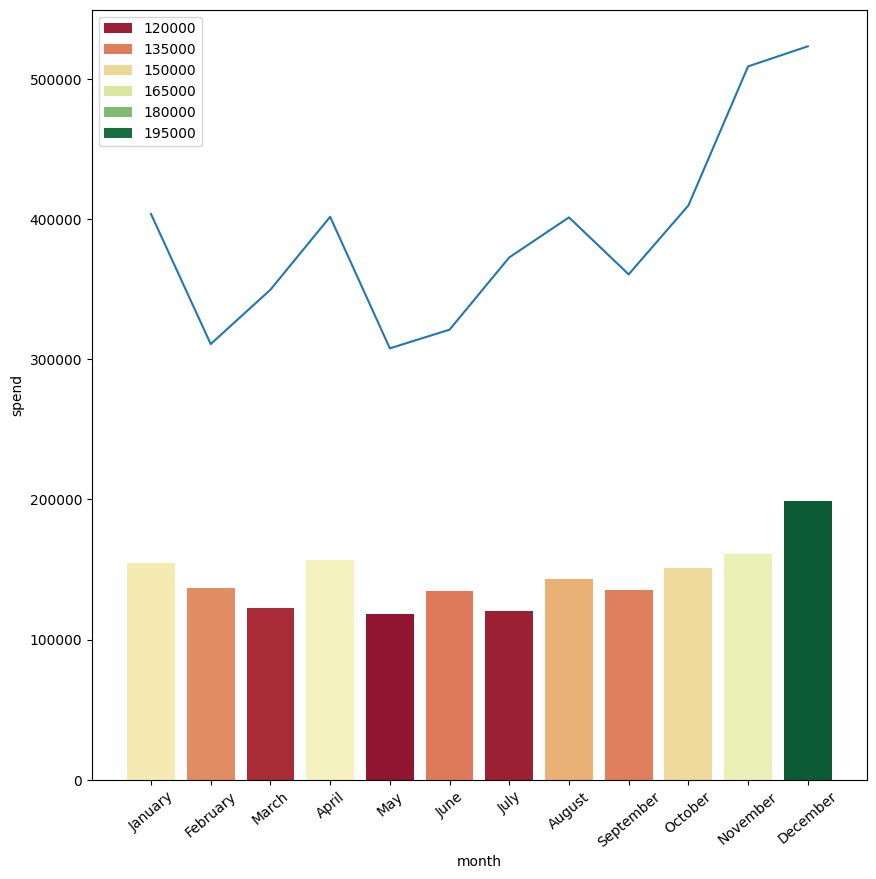

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(mdf , x = 'month' , y = 'spend' , hue = 'spend' , palette= 'RdYlGn')
plt.xticks(rotation = 40)
sns.lineplot(mdf , x = 'month' , y = 'revenue' , )
plt.legend()
plt.show()